**LU1MEPY3 - Projet numérique**

# Chute libre de Felix Baumgartner

## Préambule

Felix Baumgartner, parachutiste autrichien, s'est lancé dans le vide à 39 km au-dessus de la Terre le 14 octobre 2012 : ce saut lui a permis de battre plusieurs records du monde dont celui d'avoir dépassé le mur du son avec une vitesse maximale atteinte de 377 m/s. La durée de la chute libre était de 4 min 20 s avant l'ouverture de son parachute à environ 2,5 km d'altitude. La durée totale du saut était de 9 min 3 s (voir le site web : https://www.redbull.com/int-en/projects/red-bull-stratos/). 

Il s'agit en particulier :
- de déterminer la vitesse maximale atteinte par Baumgartner lors de la chute libre en exploitant des résultats de mesure (partie 1) ; 
- de déterminer la vitesse maximale théorique lors de la chute libre en recourant à un modèle adéquat (partie 2) ; 
- de simuler le saut en chute libre de Baumgartner (partie 3).  

Le sujet est librement inspiré d'un texte de TD de l'UE LU1MEPY2 (UE de Mécanique-Physique du 2nd semestre).

<img src="Baumgartner.jpg" style="width:267px;height:400px"/>
Photographie : Jay Nemeth/Red Bull Content Pool

Thèmes : Forces (gravitationnelle, poids, traînée). Équilibre des forces. Loi des gaz parfaits

Outils / méthodes : matplotlib ; numpy ; interpolation ; boucles ; calcul d'erreurs et de statistiques ; méthode d'Euler-Cromer 

## Partie 1. Exploitation des données expérimentales

Felix Baumgartner, équipé de son scaphandre, présente une masse d'environ $m =$ 120 kg et une superficie de $S =$ 1,1  m$^{2}$. Le coefficient de traînée vaut $C_x =$ 0,7. Sa vitesse de norme $v_{\text{B}}$ et son altitude $z_{\text{B}}$ en tout instant $t$ du saut ont été mesurées.  

Dans cette première partie, nous commençons par étudier les données expérimentales qui permettront de déduire en particulier la vitesse maximale $v_{\text{Bmax}}$ de Baumgartner et les altitudes pour lesquelles sa vitesse $v_{\text{B}}$ dépasse la vitesse du son $v_{\text{son}}$.  

Commençons par importer les bibliothèques nécessaires :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
import math as m


Le fichier "Alt-Vit-Baumgartner.txt" est constitué des données de l'altitude $z_{\text{B}}$ (en m, 1$^{\text{ère}}$ colonne) et de la norme $v_{\text{B}}$ de la vitesse de Baumgartner (en km/h, 2$^{\text{ème}}$ colonne).   
Le fichier "Alt-Vit-son.txt" est constitué des données de l'altitude $z_{\text{son}}$ (en m, 1$^{\text{ère}}$ colonne) et de la vitesse du son $v_{\text{son}}$ dans l'air (en m/s, 2$^{\text{ème}}$ colonne). La vitesse du son $v_{\text{son}}$ dans l'air varie avec la température $T$ qui varie elle-même avec l'altitude $z_{\text{son}}$ : de $v_{\text{son}}= $ 340 m/s au niveau de la mer ($z_{\text{son}} = $ 0 et à $T = $ 15°C), elle diminue dans la troposphère (jusqu'à 11 km d'altitude) pour atteindre un palier à $v_{\text{son}}= $  295 m/s dans la stratosphère basse (entre 11 et 25 km d'altitude, $T = -$56,5°C) puis remonte dans la stratosphère haute (au delà de 25 km d'altitude) : ainsi $v_{\text{son}}= $ 303 m/s à $z_{\text{son}} =$ 32 km (où $T = -$45°C) par exemple.   

**Question 1.a**  

Tracer les courbes de $v_{\text{B}}$ et de $v_{\text{son}}$ en fonction de l'altitude sur le même graphe. Inverser l'axe des abscisses (altitudes décroissantes) en utilisant la fonction "matplotlib.pyplot.axis()" (voir https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html).

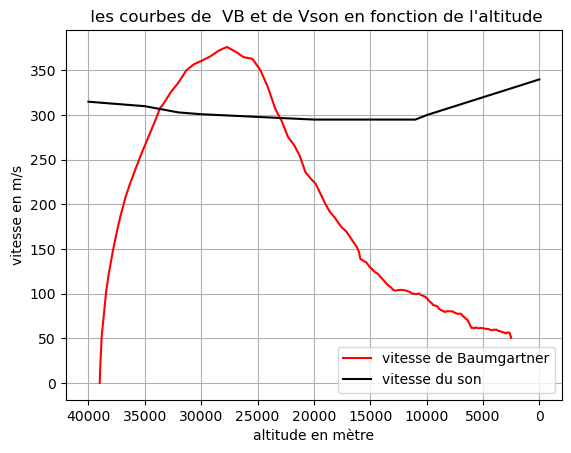

In [2]:
plt.figure()
fich=np.loadtxt('Alt-Vit-Baumgartner.txt')
fich02=np.loadtxt('Alt-Vit-son.txt')

x_baum_alt=fich[:,0]
x_son_alt=fich02[:,0]
y_baum_vit=fich[:,1]
y_baum_vit=y_baum_vit/3.6
y_son_vit=fich02[:,1]

# tracer la courbe de vb en fonction de l'altitude
plt.plot(x_baum_alt, y_baum_vit,'red', label='vitesse de Baumgartner')
plt.gca().invert_xaxis()
plt.xlabel('altitude en mètre')
plt.ylabel('vitesse en km/h')
plt.grid(True)
plt.legend()
plt.title(' les courbes de  VB et de Vson en fonction de l\'altitude')

plt.plot(x_son_alt, y_son_vit,'black', label='vitesse du son')
plt.xlabel('altitude en mètre')
plt.ylabel('vitesse en m/s')
plt.grid(True)
plt.legend()
plt.show()



**Question 1.b**  

Quelle est la vitesse maximale $v_{\text{Bmax}}$ atteinte par Baumgartner ? A quelle altitude $z_{\text{Bm}}$ correspond cette vitesse maximale ? 

In [3]:
#trouver la vitesse maximale Vbmax atteinte par Baumgartner:
Vbmax= max( y_baum_vit)
print (f'-la vitesse maximale atteinte par Baumgartner est {Vbmax:1.3f} m/s')

#trouver l'indice de la ligne de Vbmax dans le fichier 'Alt-Vit-Baumgartner.txt':
indice = np.where(y_baum_vit==Vbmax)
print(f'-l\'indice est {indice}')

#Trouver à quelle altitude Zbm il atteind cette vitesse maximale:
print(f'-Baumgartner atteind la vitesse maximale à une altitude de {x_baum_alt[105]:1.3f}m')

-la vitesse maximale atteinte par Baumgartner est 376.389 m/s
-l'indice est (array([105], dtype=int64),)
-Baumgartner atteind la vitesse maximale à une altitude de 27710.000m


**Question 1.c** 

Calculer sa vitesse moyenne jusqu'à 20 km d'altitude, puis sur toute la chute libre (avant ouverture du parachute à 2,5 km d'altitude).


In [4]:
#calculer la vitesse moyenne jusqu'à 20 km
v_moy_20=np.mean(y_baum_vit[x_baum_alt>=20000])
print(f'-la vitesse moyenne jusqu\'à 20km est estimée à {v_moy_20:1.3f} m/s')

#calculer la vitesse moyenne sur toute la chute libre
v_moy_tot=np.mean(y_baum_vit)        
print(f'-la vitesse moyenne sur toute la chute libre (avant ouverture du parachute) est estimée à {v_moy_tot:1.3f} m/s')

    

-la vitesse moyenne jusqu'à 20km est estimée à 261.451 m/s
-la vitesse moyenne sur toute la chute libre (avant ouverture du parachute) est estimée à 141.031 m/s


**Question 1.d**  

Déterminer les altitudes pour lesquelles Baumgartner se déplace à une vitesse supersonique ($v_{\text{B}}\geq v_{\text{son}}$). Pour ce faire, procéder de la façon suivante : 

i) Les valeurs d'altitude pour la vitesse de Baumgartner doivent correspondre aux valeurs d'altitude pour la vitesse du son. On commence par choisir des valeurs d'altitude régulièrement espacées de 100 m sur l'intervalle considéré de la chute libre (de 39 km à 2,5 km) ; on utilise la fonction "numpy.linspace()". Voir https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

ii) Puis, les valeurs de vitesse de Baumgartner et de vitesse de son doivent être interpolées pour les valeurs d'altitude précédemment choisies ; on utilise la fonction "numpy.interp()". Voir : https://fr.wikibooks.org/wiki/Python_pour_le_calcul_scientifique/Interpolation,_extrapolation_et_lissage ; https://numpy.org/doc/stable/reference/generated/numpy.interp.html

iii) Enfin, on recherche les valeurs d'altitude pour lesquelles les valeurs interpolées de vitesse de Baumgartner sont supérieures ou égales aux valeurs interpolées de vitesse du son ; on utilise la fonction "numpy.nonzero()". Voir : https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html#numpy.nonzero

In [5]:
#calculer le nombre de valeurs comprises entre 25KM et 39Km espacées regulierement de 100m:
i=2500
n=0
while i<=39000:
    i+=100
    n+=1
print(f'-le nombre de valeurs est égal à {n}')

#le tableau representant les valeurs comprises entre 25KM et 39Km espacées regulierement de 100m:
alt=np.linspace(39000,2500,366)

#interpoler les valeurs de vitesse de baumgartner :
vitesses_baum_interpolées=np.interp(alt,x_baum_alt,y_baum_vit)
vitesses_son_interpolées=np.interp(alt,x_son_alt,y_son_vit)
#trouver les altitudes pour lesquelles Baumgartner est plus rapide que la vitesse du son:
altitude= alt[np.nonzero(vitesses_baum_interpolées>=vitesses_son_interpolées)]
print(f'-voici les valeurs d\'altitude parmi les valeurs choisie ou Baumgartner est plus rapide que la vitesse du son:\n', altitude)



-le nombre de valeurs est égal à 366
-voici les valeurs d'altitude parmi les valeurs choisie ou Baumgartner est plus rapide que la vitesse du son:
 [33600. 33500. 33400. 33300. 33200. 33100. 33000. 32900. 32800. 32700.
 32600. 32500. 32400. 32300. 32200. 32100. 32000. 31900. 31800. 31700.
 31600. 31500. 31400. 31300. 31200. 31100. 31000. 30900. 30800. 30700.
 30600. 30500. 30400. 30300. 30200. 30100. 30000. 29900. 29800. 29700.
 29600. 29500. 29400. 29300. 29200. 29100. 29000. 28900. 28800. 28700.
 28600. 28500. 28400. 28300. 28200. 28100. 28000. 27900. 27800. 27700.
 27600. 27500. 27400. 27300. 27200. 27100. 27000. 26900. 26800. 26700.
 26600. 26500. 26400. 26300. 26200. 26100. 26000. 25900. 25800. 25700.
 25600. 25500. 25400. 25300. 25200. 25100. 25000. 24900. 24800. 24700.
 24600. 24500. 24400. 24300. 24200. 24100. 24000. 23900. 23800. 23700.
 23600. 23500. 23400. 23300. 23200. 23100.]


## Partie 2. Modélisation de la chute libre

### 2.1 Bilan des forces - Modèle avec la masse volumique constante

Lors de sa chute libre, Baumgartner est soumis à l'action de deux forces extérieures : son poids $\vec{P}$ et la force de traînée $\vec{F_\text{t}}$.  

#### a) Force de pesanteur

On choisit un axe (O$z$) vertical, dont l'origine O se situe à la surface de la Terre, orienté vers le ciel et de vecteur unitaire $\vec{u}_z$. On appelle $\mathcal{G}$ la constante gravitationnelle, $M_\text{T}$ la masse de la Terre et $R_\text{T}$ le rayon de la Terre.

Il s'agit ici d'exprimer la fonction "AccPes(z)" permettant de calculer la composante $g_{z}$ du vecteur accélération de la pesanteur $\vec{g}$ en fonction de l'altitude $z$. Pour cela, vous procéderez ainsi :  
i) à partir de l'expression de la force gravitationnelle, exprimer la composante $P_z$ du poids $\vec{P}$ de Baumgartner ;  
ii) en déduire la fonction "AccPes(z)" permettant de calculer la composante $g_z$ du vecteur accélération de la pesanteur $\vec{g}$ en fonction de l'altitude $z$.


**Question n°2.a**

Écrire la fonction **AccPes(z)**.

In [6]:
#selon la 3eme lois de newton : la terre exerce une force centripete sur baumgartner de norme : (G*Mt*Mb)/(Rt+z)^2 et cette force est la même que la force du poids qui est de norme Mb*g
#donc on retrouve g=(G*Mt)/(Rt+z)^2
G=6.67*10**(-11) #N*m^2*kg^(-2)
Mt=5.972*10**(24) #Kg
Rt=6.371 *10**6 #m
def AccPes(z):
    return (G*Mt)/((Rt+z)**2 )
 

**Question n°2.b**

Calculer $g_z$ pour quelques valeurs de $z$ comprises entre la surface du sol et l'altitude $z = $ 39 km (par pas de 5 km par exemple). Commenter la dépendance de l'accélération de la pesanteur avec l'altitude. 

In [7]:
z=np.arange(0,40000,5000)
for i in (z):
    print(f'la valeur de g pour une altitude de z= {i} km est {AccPes(i):2.3f} m*s^(-2)')

# g diminue quand z augmente  

la valeur de g pour une altitude de z= 0 km est 9.814 m*s^(-2)
la valeur de g pour une altitude de z= 5000 km est 9.798 m*s^(-2)
la valeur de g pour une altitude de z= 10000 km est 9.783 m*s^(-2)
la valeur de g pour une altitude de z= 15000 km est 9.768 m*s^(-2)
la valeur de g pour une altitude de z= 20000 km est 9.752 m*s^(-2)
la valeur de g pour une altitude de z= 25000 km est 9.737 m*s^(-2)
la valeur de g pour une altitude de z= 30000 km est 9.722 m*s^(-2)
la valeur de g pour une altitude de z= 35000 km est 9.707 m*s^(-2)


#### b) Force de traînée

La force de traînée $\vec{F_\text{t}}$ est la force de frottement exercée par l'air sur le corps de Baumgartner. Elle dépend entre autres de la vitesse $v_{\text{B}}$ de Baumgartner et de la masse volumique de l'air $\rho$ supposée ici constante.  

Il s'agit de définir la fonction **Frott(v,rho)** permettant de calculer la composante $F_{\text{t}z}$ du vecteur force de traînée $\vec{F_\text{t}}$ en fonction de $v_{\text{B}}$ et $\rho$. 

In [8]:
#Ft=0.5*(m/v)*S*Cx*V^2

**Question n°2.c**

Écrire la fonction **Frott(v,rho)**.

In [9]:
m=120 #Kg
Cx= 0.7
S=1.1 #m^2

def Frott(v,rho):
    return 0.5*rho*S*Cx*v**2

#### c) Condition d'équilibre et vitesse maximale atteinte dans le cadre du modèle "masse volumique de l'air constante"

À partir de la condition d'équilibre des forces, projetée selon l'axe (O$z$), il est possible de déduire l'expression de la vitesse maximale que peut atteindre Baumgartner. Il s'agit ici de calculer cette vitesse en utilisant un modèle dans lequel la masse volumique de l'air est supposée constante ainsi que l'accélération de la pesanteur ($g_z = -$9,75 m/s$^2$). Vous choisirez comme valeur de $\rho$ la valeur typique de la masse volumique de l'air à 15°C au niveau de la mer. La vitesse maximale ainsi calculée sera comparée à la vitesse maximale mesurée (Question 1.b).

**Question n°2.d**

Calculer la valeur numérique de la vitesse maximale théorique $v_\text{Bm-th}$. Comparer avec la valeur mesurée $v_\text{Bmax}$ et conclure.


In [10]:
import math as m
masse=120 #Kg
Cx= 0.7
S=1.1 #m^2
g=9.75 #m*s^(-2)
rho_2=1.225 #kg*m^(-3)
Vbm_th=m.sqrt((2*masse*g)/(rho_2*Cx*S))
print(f'la valeur de la vitesse maximale theorique est {Vbm_th:1.2f}m/s')
#La vitesse maximale théorique Vbm-th est très nettement supérieure à la vitesse réelle mesurée Vbmax (49.81 <<< 376.). On en conclut que les frottements de l'air ont grandement ralenti la vitesse de Baumgartner dans l'atmoshpère

la valeur de la vitesse maximale theorique est 49.81m/s


### 2.2. Bilan des forces - Modèle avec variations de la masse volumique de l'air avec l'altitude 

La pression $p$, la température $T$ et la masse volumique de l’air $\rho$ varient avec l’altitude $z$. En particulier, $\rho$ décroit rapidement quand $z$ augmente.  

#### a) $\rho= f(z)$ : courbe expérimentale

##### **Question 2.e**  

Le fichier "Alt-Masse-vol.txt" est constitué des données de l'altitude $z$ (en m, 1$^{\text{ère}}$ colonne) et de la masse volumique $\rho$ (kg/m$^3$, 2$^{\text{ème}}$ colonne). Tracer la courbe $\rho = f(z)$.


<function matplotlib.pyplot.show(close=None, block=None)>

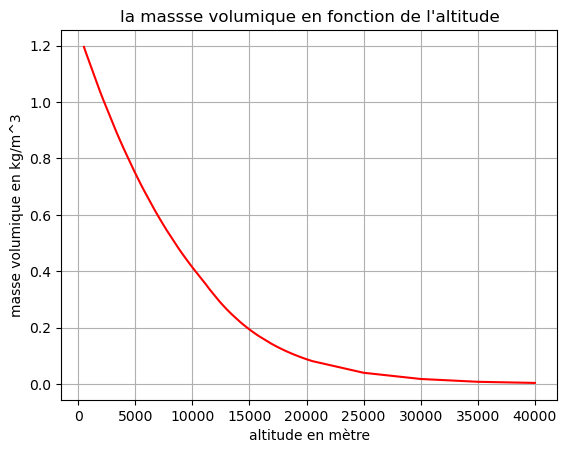

In [11]:
plt.figure()
fich03=np.loadtxt('Alt-Masse-vol.txt')

x_alt=fich03[:,0]
y_masse_volu=fich03[:,1]
plt.plot(x_alt, y_masse_volu,'red')
plt.xlabel('altitude en mètre')
plt.ylabel('masse volumique en kg/m^3')
plt.grid(True)
plt.title('la massse volumique en fonction de l\'altitude')
plt.show


#### b) $\rho(z)$ : modèle d'atmosphère

##### **Question 2.f** 

En partant de la loi des gaz parfaits, déterminer l'expression de la masse volumique $\rho(z)$ en fonction en particulier de la pression $p(z)$ et de la température $T(z)$.

# loi des gaz parfaits p.v=n.R.T

avec:

p (pression en pascal) v (volume en m^3) n (quantité de matière en mol) R constante molaire des gaz parfaits T temperature en kelvin on a: n=m/M m (masse) M (masse molaire)

et on a la loi ded masse voulmique comme étant:

rho=m/v

donc:

p.v=rho.v.R.T/M ainsie:

rho=pM/RT

##### **Question 2.g**  

Nous allons ici étudier les variations de la masse volumique en fonction de l'altitude en utilisant les modèles adéquats décrivant $p(z)$ et $T(z)$.

**Dans la troposphère ($z\leqslant$ 11 km)**, c'est le modèle à gradient de température constant qui est le mieux adapté : $T(z) = T_0+\alpha_{\text{T}} z$ avec $T_0 =$ 15°C et $\alpha_{\text{T}} = -$0.0065 K/m. 
Ainsi, la pression s'écrit : $p(z) = p_{0} \left({\frac{T_0}{T(z)}}\right)^{\frac{Mg}{\mathcal{R}\alpha_{\text{T}}}}$. $p_{0}$ et $T_0$ sont respectivement les pression et température au niveau du sol. $\mathcal{R}$ est la constante des gaz parfaits.  

Au delà de la troposphère, on pénètre dans la **stratosphère basse (11 km $\lt z \leqslant$ 25 km)**, dans laquelle la température reste quasiment constante ($T_1 = -$56.5°C). Le modèle à appliquer est donc celui de l'atmosphère isotherme. Ainsi, $\rho(z) = \frac{M }{\mathcal{R} T_1}p(z) $ avec la pression $p(z) = p_{1} \exp{\left(-\frac{Mg}{\mathcal{R}T_1}(z - z_1)\right)}$. $p_{1}$ est la pression à $z_1=11$ km. 

**Enfin, dans la stratosphère haute ($z \gt$ 25 km)**, la température croît linéairement selon la relation suivante :  $T$(°C) $= -$131,25 + 0.00299$z$. C'est à nouveau le modèle à gradient de température qui est le mieux adapté pour traduire l'évolution de $\rho(z)$ dans cette zone d'atmosphère.

Nous négligerons la dépendance de l'accélération de la pesanteur avec l'altitude ; on fixe la norme de $\vec{g}$ à $g=$ 9,75 m/s$^2$. Écrire la fonction **MassVol_th(z)**.

--

In [12]:

def MassVol_th(z):
    T0     = 15+273.15 # 15°c=288.15K
    alpha_t=-6.5*10**(-3)  #K/m
    P0     = 101325 #Pa
    g_cst  = 9.75 #m*s^-2
    masse_molaire_air=0.029
    T1= 216.65 #K #temperature dans la stratosphère basse
    R=8.31
    z1=11000 #m
    P1=P0*(T0/(T0+alpha_t*z1))**(masse_molaire_air*g_cst/(R*alpha_t)) # la pression à 11km
    P2= P1*m.exp(-masse_molaire_air*g_cst*(25000-z1)/(R*T1)) #la pression à 
    alpha_t2=0.00299 #°c/m8
    if z<= 11000 :#en mètre
        t=T0+alpha_t*z
        p= P0*(T0/t)**(masse_molaire_air*g_cst/(R*alpha_t))
        return (p*masse_molaire_air)/(R*t)
    elif 11000<z<=25000:
        p=P1*m.exp(-masse_molaire_air*g_cst*(z-z1)/(R*T1))
        return masse_molaire_air*p/(R*T1)
    elif z>25000:
        t2=(-131.25+0.00299*z)+273.15 #K
        p= P2*((T1/t2)**(masse_molaire_air*g_cst/(R*alpha_t2)))
        return p*masse_molaire_air/(R*t2)
        

**Question 2.h** 

Tracer la courbe expérimentale et celle du modèle de la masse volumique de l'air de 0 à 40 km d'altitude sur le même graphe.

<function matplotlib.pyplot.show(close=None, block=None)>

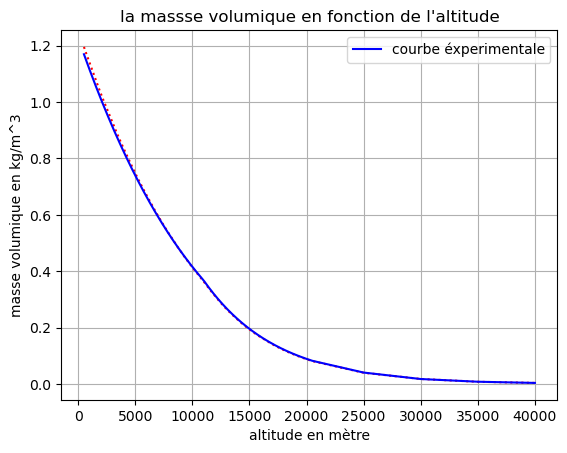

In [13]:
plt.figure()
fich03=np.loadtxt('Alt-Masse-vol.txt')

x_alt=fich03[:,0]
y_masse_volu=fich03[:,1]
plt.plot(x_alt, y_masse_volu,'r:')
plt.xlabel('altitude en mètre')
plt.ylabel('masse volumique en kg/m^3')
plt.grid(True)
plt.title('la massse volumique en fonction de l\'altitude')

liste=[]
for i in x_alt:
    liste.append(MassVol_th(i))

masse_vol=np.array(liste)
    

plt.plot(x_alt,masse_vol, 'b',label="courbe éxperimentale" )
plt.legend()
plt.show


**Question 2.i** 

Déterminer la nouvelle vitesse maximale théorique $v_\text{Bm-th-new}$ atteinte par Baumgartner. Comparer avec la valeur mesurée $v_\text{Bmax}$ et conclure.

In [14]:
import math as m
masse=120 #Kg
Cx= 0.7
S=1.1 #m^2
g=9.75 #m*s^(-2)
rho_new=MassVol_th(27710) #kg*m^(-3)
Vbm_th_new=m.sqrt((2*masse*g)/(rho_new*Cx*S))
print(f'la valeur de la vitesse maximale theorique est {Vbm_th_new:1.2f} m/s')


la valeur de la vitesse maximale theorique est 343.02 m/s


#### S'il vous reste encore du temps...

## Partie 3. Simulation de la chute libre de Felix Baumgartner 

Il s'agit ici de simuler la chute libre de Felix Baumgartner qui s'est élancé sans vitesse initiale.  
Nous allons d'abord définir la fonction qui permet de calculer l'accélération de Baumgartner.   
Puis par une méthode de discrétisation (méthode d'Euler-Cromer), nous allons simuler son accélération, sa vitesse et son altitude au cours du temps de chute.   
Nous terminerons par une analyse des résultats de simulation.

### 3.1 Accélération

Nous avons défini précédemment la fonction permettant de modéliser la dépendance de la masse volumique de l'air avec l'altitude (§ 2.2). Nous rappelons que la masse volumique intervient dans l'expression de la force de traînée (§ 1.2). Nous allons ici déterminer la fonction **"Accel(z,v)"** permettant de déterminer l'accélération de Baumgartner au cours de sa chute libre.

**Question n°3.a**

À partir de la relation fondamentale de la dynamique, écrire la fonction **Accel(z,v)**, permettant de calculer la composante $a_z$ de l'accélération $\vec{a}$ de Baumgartner au cours de sa chute libre. On néglige la dépendance de l'accélération de la pesanteur avec l'altitude ; on fixe la norme de $\vec{\mathrm{g}}$ à g = 9,75 m/s$^2$.

In [15]:
def Accel(z,v):
    g=-9.75
    return g+(MassVol_th(z)*Cx*S*v**2)/(2*masse)


### 3.2 Méthode d'Euler-Cromer

Il s'agit ici de simuler le mouvement de Baumgartner, c'est-à-dire déterminer son accélération, sa vitesse et sa position en fonction du temps. Accélération et vitesse changent constamment au cours du temps de chute. Mais si on les regarde sur un très petit pas de temps, on peut les considérer constantes. En appliquant ce principe, il est possible de calculer une longue série de mouvements linéaires à vitesse constante, et d'obtenir ainsi des résultats étonnamment précis. La méthode d'Euler-Cromer est une méthode numérique appliquant ce principe.

La méthode d'Euler-Cromer produit une solution discrète approximative par itérations successives :   
    $v_{i+1} = v_i + Accel(z_i, v_i) * \Delta t$  
    $z_{i+1} = z_i + v_{i+1} * \Delta t$  
où Δt est le pas de temps. 

Pour mettre en oeuvre cette méthode, il faut commencer par définir le nombre d'itérations ($i$ varie de 0 à $n$) ainsi que le pas de temps (Δ$t$) : il est conseillé de prendre $n =$ 5000 et Δ$t$ = 52 ms. Les valeurs d'accélération, vitesse et altitude de Baumgartner en fonction du temps seront stockées dans des tableaux qu'il faudra donc créer au préalable. Il faudra également définir l'altitude de départ.

**Question n°3.b**

Mettre en oeuvre la méthode d'Euler-Cromer pour déterminer les composantes $a_z$ de l'accélération et $v_z$ de la vitesse ainsi que l'altitude $z$ de Baumgartner en fonction du temps $t$ de chute libre. 

In [16]:

n          = 5000  #nombre d'iterations 
dt         = 0.052    # le pas de temps en seconde s
acc_depart = 0 #m/s
vit_depart = 0 #m/s

#initialisation des tableaux:
vitesse=np.zeros(n)
altitude= np.zeros(n)
acceleration=np.zeros(n)

#definition des conditions initiales:
altitude[0]=39000


#application de la methode d'Euler_Cromer:
for i in range(n-1):
    acceleration[i]=Accel(altitude[i],vitesse[i])
    vitesse[i+1]=vitesse[i]+acceleration[i]*dt
    altitude[i+1]=altitude[i]+vitesse[i+1]*dt
#acceleration[n-1]=Accel(altitude[n-1], vitesse[n-1])

**Question n°3.c**

Tracer sur trois graphes placés côte-à-côte les courbes de simulation donnant $z=f(t), v_z=f(t)$ et $a_z = f(t)$. 

<function matplotlib.pyplot.show(close=None, block=None)>

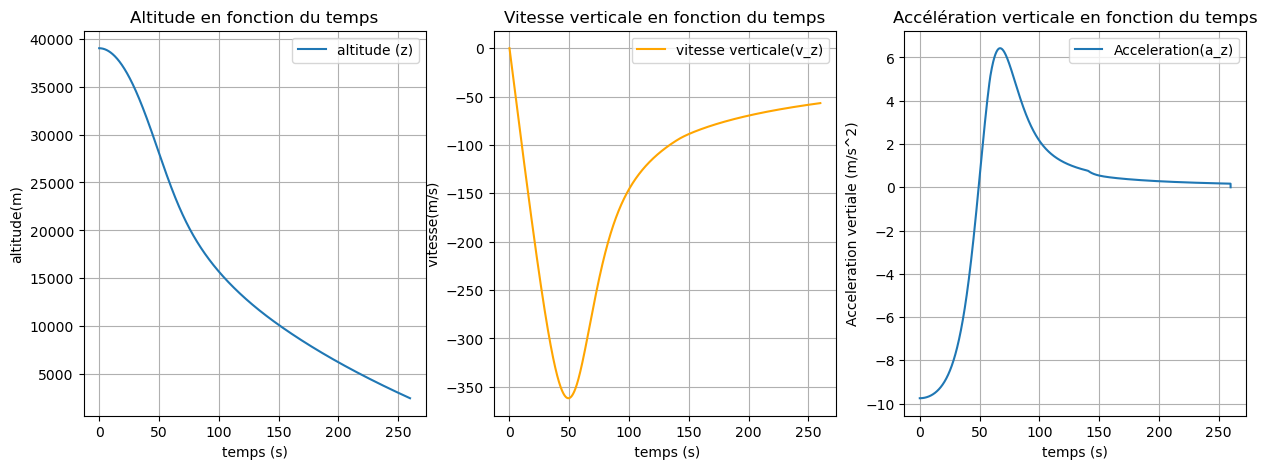

In [17]:

t=np.arange(0,n*dt,dt)
plt.figure(1,figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(t,altitude,label='altitude (z)')
plt.xlabel('temps (s)')

plt.ylabel('altitude(m)')
plt.title('Altitude en fonction du temps')
plt.grid()
plt.legend() 


plt.subplot(1,3,2)
plt.plot(t, vitesse, label='vitesse verticale(v_z)', color='orange')
plt.xlabel(' temps (s)')
plt.ylabel(' vitesse(m/s) ')
plt.title('Vitesse verticale en fonction du temps')
plt.grid()
plt.legend()

plt.subplot(1,3,3)
plt.plot(t, acceleration , label= 'Acceleration(a_z)')
plt.xlabel('temps (s)')
plt.ylabel('Acceleration vertiale (m/s^2)')
plt.title('Accélération verticale en fonction du temps')
plt.grid()
plt.legend()
plt.show

### 3.3 Analyse des résultats de simulation

**Question n°3.d**

Quelle est l'altitude atteinte par Baumgartner au moment de l'ouverture de son parachute ? Comparer avec la valeur mesurée.

In [18]:
#l'atitude atteinte par Baumgartner au moment de l'ouverture de son parachute
print("Baumgartner ouvre son parachute à 260 seconde, ainsie d'après notre graphique, il ouvre son parachute à une altitude de", f"{altitude[-1]:1.2f}","m")
#conclusion:
print("On conclut que celà coïncide avec la valeur mesurée, donc le graphique est correcte")

Baumgartner ouvre son parachute à 260 seconde, ainsie d'après notre graphique, il ouvre son parachute à une altitude de 2495.13 m
On conclut que celà coïncide avec la valeur mesurée, donc le graphique est correcte


**Question n°3.e**

Tracer sur un même graphe les courbes de vitesse expérimentale (fichier "Temps-Vit-Baumgartner.txt" ; 1ère colonne : temps en s ; 2ème colonne : vitesse en m/s) et vitesse simulée en fonction du temps de chute libre. Quelle est la vitesse maximale obtenue par simulation ? Comparer avec la valeur mesurée.

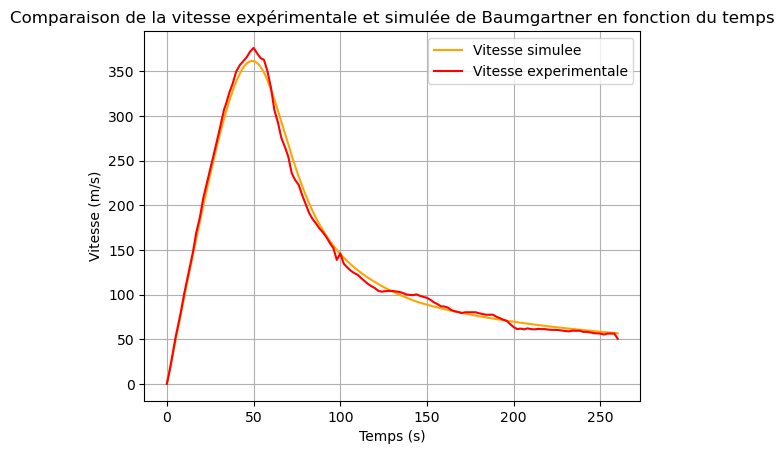

la vitesse maximale obtenue par simulation est 361.75m/s


In [19]:
Temps_Vit_Baumgartner=np.loadtxt('Temps-Vit-Baumgartner.txt')
v1=Temps_Vit_Baumgartner[:,1]/3.6
t1=Temps_Vit_Baumgartner[:,0]

#on trace le courbe de la vitesse en fonction du temps
plt.plot(t, abs(vitesse), label='Vitesse simulee', color='orange')
plt.xlabel('Temps (s)')
plt.ylabel('Vitesse (m/s)')
plt.title('Vitesse verticale en fonction du temps')
plt.legend()

#on trace la courbe de la vitesse simulée de Baumgartner

plt.plot(t1, v1, label='Vitesse experimentale', color='red')
plt.xlabel('Temps (s)')
plt.ylabel('Vitesse (m/s)')
plt.title('Comparaison de la vitesse expérimentale et simulée de Baumgartner en fonction du temps')
plt.legend()
plt.grid(True)
plt.show()

# la vitesse maximale : 
v_max_simulee=np.max(abs(vitesse))
print(f'la vitesse maximale obtenue par simulation est {v_max_simulee:1.2f} m/s' )


**Question n°3.f**

Tracer l'histogramme des erreurs relatives entre courbes de vitesse expérimentale et vitesse simulée. 

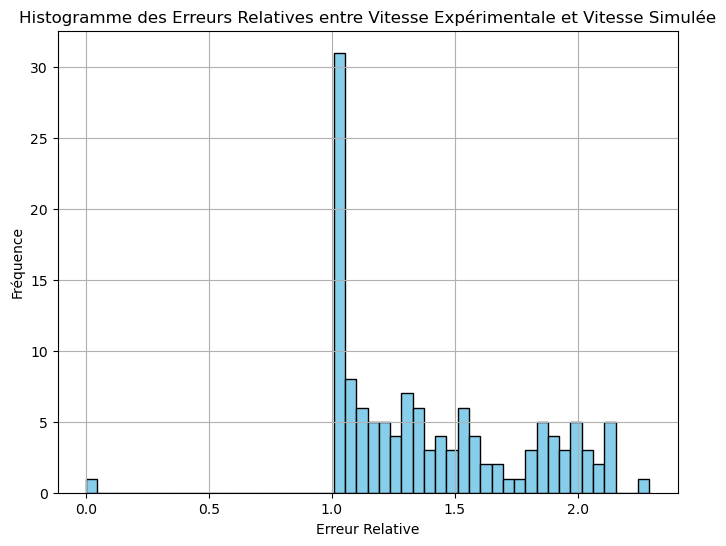

In [20]:
# Calcul des erreurs relatives en évitant la division par zéro
v2=vitesse[:130]
numerateur = np.abs(v1 - v2)
denominateur = np.abs(v1)

# Remplace les valeurs de denominateur égales à zéro par 1 pour éviter la division par zéro
denominateur[denominateur == 0] = 1

# Calcul des erreurs relatives
erreurs_relatives = numerateur / denominateur

# Tracer l'histogramme
plt.figure(figsize=(8, 6))
plt.hist(erreurs_relatives, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Erreur Relative')
plt.ylabel('Fréquence')
plt.title('Histogramme des Erreurs Relatives entre Vitesse Expérimentale et Vitesse Simulée')
plt.grid(True)
plt.show()

**Question n°3.g**

Commenter les points suivants de la courbe de l'accélération : valeur initiale, valeur nulle et valeur finale.

In [52]:
print("La valeur initiale de l'accélération d'environ -10 m/s² est probablement due à la gravité. En physique, l'accélération due à la gravité sur la surface de la Terre est généralement approximée à environ -9,8 m/s² vers le bas. Cette valeur négative signifie que l'accélération gravitationnelle est dirigée vers le bas, ce qui est habituellement choisi comme direction négative.Lorsqu'un objet est lâché sans vitesse initiale ou qu'il est en chute libre, l'accélération principale agissant sur lui est celle due à la gravité. Cette accélération vers le bas est généralement représentée comme une valeur négative dans les simulations ou les calculs.Ainsi, une valeur initiale d'accélération d'environ -10 m/s² au début de la chute libre correspond à l'accélération gravitationnelle à la surface de la Terre, ce qui est cohérent avec ce à quoi on pourrait s'attendre dans une simulation ou un calcul de chute libre")

La valeur initiale de l'accélération d'environ -10 m/s² est probablement due à la gravité. En physique, l'accélération due à la gravité sur la surface de la Terre est généralement approximée à environ -9,8 m/s² vers le bas. Cette valeur négative signifie que l'accélération gravitationnelle est dirigée vers le bas, ce qui est habituellement choisi comme direction négative.Lorsqu'un objet est lâché sans vitesse initiale ou qu'il est en chute libre, l'accélération principale agissant sur lui est celle due à la gravité. Cette accélération vers le bas est généralement représentée comme une valeur négative dans les simulations ou les calculs.Ainsi, une valeur initiale d'accélération d'environ -10 m/s² au début de la chute libre correspond à l'accélération gravitationnelle à la surface de la Terre, ce qui est cohérent avec ce à quoi on pourrait s'attendre dans une simulation ou un calcul de chute libre


In [53]:
print("Lors d'une chute libre ou d'un mouvement où la seule force agissant sur un objet est la gravité, il y a un point où la vitesse cesse d'augmenter, atteignant une vitesse constante. À ce stade, l'accélération devient nulle.Cela indique que la vitesse ne change plus,si on regarde sur la courbe tracée, l'acceleration est nulle lorsque la vitesse est a son maximum et cesse de varier, la pente de la vitesse est nulle à ce moment, c'est à envirion 50 sec.")

Lors d'une chute libre ou d'un mouvement où la seule force agissant sur un objet est la gravité, il y a un point où la vitesse cesse d'augmenter, atteignant une vitesse constante. À ce stade, l'accélération devient nulle.Cela indique que la vitesse ne change plus,si on regarde sur la courbe tracée, l'acceleration est nulle lorsque la vitesse et a son maximum et cesse de varier, la pente de la vitesse est nulle à ce moment, c'est à envirion 50 sec.


In [54]:
print("On remarque que la valeure finale de l'acceleration est nulle car la vitesses est presque constante sur la fin, et on sait que l'accélération est la dérivée de la vitesse,donc si celle ci est constante, l'acceleration sera nulle. ")

On remarque que la valeure finale de l'acceleration est nulle car la vitesses est presque constante sur la fin, et on sait que l'accélération est la dérivée de la vitesse,donc si celle ci est constante, l'acceleration sera nulle. 
